In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import folium

#import csv
internet_data = pd.read_csv('../Resources/internet-data.csv')
internet_data.head()

,Country,Edition,1.1.1) Internet users,1.1.2) Fixed-line broadband subscribers,1.1.3) Mobile subscribers,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,1.2.1) Average fixed broadband upload speed,1.2.2) Average fixed broadband download speed,1.2.3) Average fixed broadband latency,...,BG15) Internet users (population),BG16) Offline population,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers,BG24) Total fixed line broadband subscribers
0,United States,E1,81.5,31.85,119.1,NaN,NaN,25.30,51.74,45.00,...,239.23,81.65,NaN,NaN,74.6,NaN,NaN,95.0,91.0,102212000
1,United States,E2,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,E3,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,E4,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,E5,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000


In [2]:
# printing column names just to see what we're dealing with

print(internet_data.columns)

Index(['Country', 'Edition', '1.1.1) Internet users',
       '1.1.2) Fixed-line broadband subscribers', '1.1.3) Mobile subscribers',
       '1.1.4) Gender gap in internet access',
       '1.1.5) Gender gap in mobile phone access',
       '1.2.1) Average fixed broadband upload speed',
       '1.2.2) Average fixed broadband download speed',
       '1.2.3) Average fixed broadband latency',
       '1.2.4) Average mobile upload speed',
       '1.2.5) Average mobile download speed', '1.2.6) Average mobile latency',
       '1.2.7) Bandwidth capacity', '1.3.1) Network coverage (min. 2G)',
       '1.3.2) Network coverage (min. 3G)',
       '1.3.3) Network coverage (min. 4G)', '1.3.4) 5G deployment',
       '1.3.5) Government initiatives to make Wi-Fi available',
       '1.3.6) Private sector initiatives to make Wi-Fi available',
       '1.3.7) Unlicensed spectrum policy', '1.3.8) Internet exchange points',
       '1.4.1) Urban electricity access', '1.4.2) Rural electricity access',
       '2.1.

In [3]:
edition_mapping = {'E1': 2017, 'E2': 2018, 'E3': 2019, 'E4': 2020, 'E5': 2021}

internet_data['Edition'] = internet_data['Edition'].map(edition_mapping)

# #fill NaN values with 0
# internet_data.fillna(0, inplace=True)

internet_data

,Country,Edition,1.1.1) Internet users,1.1.2) Fixed-line broadband subscribers,1.1.3) Mobile subscribers,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,1.2.1) Average fixed broadband upload speed,1.2.2) Average fixed broadband download speed,1.2.3) Average fixed broadband latency,...,BG15) Internet users (population),BG16) Offline population,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers,BG24) Total fixed line broadband subscribers
0,United States,2017,81.5,31.85,119.1,NaN,NaN,25.30,51.74,45.00,...,239.23,81.65,NaN,NaN,74.6,NaN,NaN,95.0,91.0,102212000
1,United States,2018,81.9,32.73,122.6,1.1,2.1,23.40,63.31,34.77,...,276.32,46.69,1.0,2.0,85.5,87.0,86.0,95.0,93.0,105714000
2,United States,2019,83.8,33.28,123.0,-3.4,0.0,31.96,83.91,34.76,...,283.72,41.37,-3.0,0.0,87.3,87.0,90.0,95.0,95.0,108199000
3,United States,2020,85.3,33.89,129.0,1.1,1.1,42.98,110.88,27.77,...,289.48,37.62,1.0,1.0,88.5,91.0,90.0,95.0,94.0,110865000
4,United States,2021,85.3,34.72,134.5,0.0,3.1,53.53,136.87,28.38,...,289.48,37.62,0.0,3.0,88.5,94.0,94.0,97.0,94.0,114093000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,2017,21.6,1.19,92.3,NaN,NaN,7.60,8.41,73.00,...,3.14,10.67,NaN,NaN,22.7,NaN,NaN,75.0,68.0,163987
596,Zimbabwe,2018,22.1,1.22,91.8,32.4,1.2,9.12,9.52,41.92,...,3.24,10.79,12.0,1.0,23.1,37.0,25.0,81.0,80.0,170838
597,Zimbabwe,2019,24.0,1.32,99.0,45.2,2.5,9.74,9.79,45.13,...,3.85,10.39,19.0,2.0,27.1,42.0,23.0,80.0,78.0,187310
598,Zimbabwe,2020,30.3,1.41,89.4,26.3,-2.7,11.46,12.16,55.46,...,3.85,10.39,10.0,-2.0,27.1,38.0,28.0,75.0,77.0,203056


In [4]:
# need to figure out how to make this chart work

#sizes = [internet_data["BG20) Male internet users"].sum(), internet_data["BG21) Female internet users"].sum()]
#sns.violinplot(x='4.1.2) Educational attainment', y=internet_data, data=internet_data)
#plt.title('Internet Users by Education Level')
#plt.show()


In [6]:
# internet_data_recent = internet_data.dropna(how='any')

# # internet_data_recent

In [7]:
#get rid of irrelevant columns

relevant_columns = ['Country', 'Edition', 
                '1.1.1) Internet users',
                '1.1.4) Gender gap in internet access', 
                '1.1.5) Gender gap in mobile phone access',
                '4.1.1) Level of literacy', 
                '4.1.2) Educational attainment',
                '4.1.3) Support for digital literacy', 
                'BG2) Population',
                'BG3) Urban population',
                'BG4) GNI per capita',
                'BG6) Population under the poverty line',
                'BG17) Internet access gender gap',
                'BG18) Mobile phone access gender gap', 
                'BG19) Internet users (percent of population)',
                'BG20) Male internet users', 
                'BG21) Female internet users',
                'BG22) Male mobile phone subscribers', 
                'BG23) Female mobile phone subscribers']

demographic_df = internet_data[relevant_columns]
demographic_df

,Country,Edition,1.1.1) Internet users,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,4.1.1) Level of literacy,4.1.2) Educational attainment,4.1.3) Support for digital literacy,BG2) Population,BG3) Urban population,BG4) GNI per capita,BG6) Population under the poverty line,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG22) Male mobile phone subscribers,BG23) Female mobile phone subscribers
0,United States,2017,81.5,NaN,NaN,100.0,13.3,3.0,323.0,81.7,56740,0.9,NaN,NaN,74.6,NaN,NaN,95.0,91.0
1,United States,2018,81.9,1.1,2.1,100.0,13.4,3.0,325.1,81.9,57180,0.9,1.0,2.0,85.5,87.0,86.0,95.0,93.0
2,United States,2019,83.8,-3.4,0.0,100.0,13.4,3.0,327.1,82.1,59060,1.0,-3.0,0.0,87.3,87.0,90.0,95.0,95.0
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,2017,21.6,NaN,NaN,86.9,8.3,NaN,14.0,32.4,1280,5.2,NaN,NaN,22.7,NaN,NaN,75.0,68.0
596,Zimbabwe,2018,22.1,32.4,1.2,86.9,8.3,NaN,14.2,32.3,1290,5.2,12.0,1.0,23.1,37.0,25.0,81.0,80.0
597,Zimbabwe,2019,24.0,45.2,2.5,86.9,8.3,NaN,14.4,32.2,1360,5.2,19.0,2.0,27.1,42.0,23.0,80.0,78.0
598,Zimbabwe,2020,30.3,26.3,-2.7,86.9,8.3,1.0,14.6,32.2,1530,9.3,10.0,-2.0,27.1,38.0,28.0,75.0,77.0


In [8]:
##Data Cleaning and Organizaion

#rename columns
newcolname_dict = {
    'Country': 'Country',
    'Edition': 'Edition',
    'BG2) Population': 'Population (Millions)',
    'BG19) Internet users (percent of population)': 'Internet Users (% of Population)',
    '4.1.1) Level of literacy': 'Literacy (% of Population)',
    '4.1.2) Educational attainment': 'Education Level (Years of Schooling)',
    '4.1.3) Support for digital literacy': 'Support for Digital Literacy (Qualitative Rating 1-3)',
    'BG3) Urban population': 'Urban Population (% of Total Population)',
    'BG4) GNI per capita': 'GNI Per Capita (USD per Person)',
    'BG6) Population under the poverty line': 'Population Under the Poverty Line (% of Population)',
    'BG17) Internet access gender gap': 'Internet Access Gender Gap (Difference in Percentage Points)',
    'BG18) Mobile phone access gender gap': 'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'BG20) Male internet users': 'Male Internet Users (% of Male Population)',
    'BG21) Female internet users': 'Female Internet Users (% of Female Population)',
    'BG22) Male mobile phone subscribers': 'Male Mobile Phone Subscribers (% of Male Population)',
    'BG23) Female mobile phone subscribers': 'Female Mobile Phone Subscribers (% of Female Population)'
}

demographic_df_renamed = demographic_df.rename(columns=newcolname_dict)

demographic_df_renamed.head()

,Country,Edition,1.1.1) Internet users,1.1.4) Gender gap in internet access,1.1.5) Gender gap in mobile phone access,Literacy (% of Population),Education Level (Years of Schooling),Support for Digital Literacy (Qualitative Rating 1-3),Population (Millions),Urban Population (% of Total Population),GNI Per Capita (USD per Person),Population Under the Poverty Line (% of Population),Internet Access Gender Gap (Difference in Percentage Points),Mobile Phone Access Gender Gap (Difference in Percengage Points),Internet Users (% of Population),Male Internet Users (% of Male Population),Female Internet Users (% of Female Population),Male Mobile Phone Subscribers (% of Male Population),Female Mobile Phone Subscribers (% of Female Population)
0,United States,2017,81.5,NaN,NaN,100.0,13.3,3.0,323.0,81.7,56740,0.9,NaN,NaN,74.6,NaN,NaN,95.0,91.0
1,United States,2018,81.9,1.1,2.1,100.0,13.4,3.0,325.1,81.9,57180,0.9,1.0,2.0,85.5,87.0,86.0,95.0,93.0
2,United States,2019,83.8,-3.4,0.0,100.0,13.4,3.0,327.1,82.1,59060,1.0,-3.0,0.0,87.3,87.0,90.0,95.0,95.0
3,United States,2020,85.3,1.1,1.1,100.0,13.4,3.0,329.1,82.3,63200,1.0,1.0,1.0,88.5,91.0,90.0,95.0,94.0
4,United States,2021,85.3,0.0,3.1,100.0,13.4,3.0,331.0,82.5,65760,1.0,0.0,3.0,88.5,94.0,94.0,97.0,94.0


In [9]:
#reorder columns
new_column_order = [
    'Country',
    'Edition',
    'Population (Millions)',
    'Internet Users (% of Population)',
    'Urban Population (% of Total Population)',
    'Population Under the Poverty Line (% of Population)',
    'GNI Per Capita (USD per Person)',
    'Literacy (% of Population)',
    'Education Level (Years of Schooling)',
    'Support for Digital Literacy (Qualitative Rating 1-3)',
    'Internet Access Gender Gap (Difference in Percentage Points)',
    'Male Internet Users (% of Male Population)',
    'Female Internet Users (% of Female Population)',
    'Mobile Phone Access Gender Gap (Difference in Percengage Points)',
    'Male Mobile Phone Subscribers (% of Male Population)',
    'Female Mobile Phone Subscribers (% of Female Population)'
]

demo_data_all_years = demographic_df_renamed[new_column_order]

demo_data_all_years


,Country,Edition,Population (Millions),Internet Users (% of Population),Urban Population (% of Total Population),Population Under the Poverty Line (% of Population),GNI Per Capita (USD per Person),Literacy (% of Population),Education Level (Years of Schooling),Support for Digital Literacy (Qualitative Rating 1-3),Internet Access Gender Gap (Difference in Percentage Points),Male Internet Users (% of Male Population),Female Internet Users (% of Female Population),Mobile Phone Access Gender Gap (Difference in Percengage Points),Male Mobile Phone Subscribers (% of Male Population),Female Mobile Phone Subscribers (% of Female Population)
0,United States,2017,323.0,74.6,81.7,0.9,56740,100.0,13.3,3.0,NaN,NaN,NaN,NaN,95.0,91.0
1,United States,2018,325.1,85.5,81.9,0.9,57180,100.0,13.4,3.0,1.0,87.0,86.0,2.0,95.0,93.0
2,United States,2019,327.1,87.3,82.1,1.0,59060,100.0,13.4,3.0,-3.0,87.0,90.0,0.0,95.0,95.0
3,United States,2020,329.1,88.5,82.3,1.0,63200,100.0,13.4,3.0,1.0,91.0,90.0,1.0,95.0,94.0
4,United States,2021,331.0,88.5,82.5,1.0,65760,100.0,13.4,3.0,0.0,94.0,94.0,3.0,97.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,2017,14.0,22.7,32.4,5.2,1280,86.9,8.3,NaN,NaN,NaN,NaN,NaN,75.0,68.0
596,Zimbabwe,2018,14.2,23.1,32.3,5.2,1290,86.9,8.3,NaN,12.0,37.0,25.0,1.0,81.0,80.0
597,Zimbabwe,2019,14.4,27.1,32.2,5.2,1360,86.9,8.3,NaN,19.0,42.0,23.0,2.0,80.0,78.0
598,Zimbabwe,2020,14.6,27.1,32.2,9.3,1530,86.9,8.3,1.0,10.0,38.0,28.0,-2.0,75.0,77.0


In [10]:
# Group the data by 'Country' and calculate the mean for each country
# Replace 'df' with your DataFrame name
demo_data_agg = demo_data_all_years.groupby('Country').mean()

# Reset the index so 'Country' becomes a column again
demo_data_agg = demo_data_agg.reset_index()

# Now, aggregated_data contains the average of all numeric columns for each country


## Internet Usage by Country

In [41]:
#map showing internet usage by country where each country dot is sized based on % internet usage
#working on scale so it is easy to read
#be warned...it takes a while to run

import hvplot.pandas

demo_df = demo_data_agg.copy()

import numpy as np

api_key = 'a40367c3e2244baea0e6f64ed5353081'

demo_df['Latitude'] = None
demo_df['Longitude'] = None

#this code without the 'type' param thinks jordan and lebanon are places in the us. the 'type' param throws an error.
def get_coordinates(country, api_key):
    base_url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        'text': country,
        # 'type': 'country',
        'apiKey': api_key}
    response = requests.get(base_url, params=params)
    data = response.json()
    coordinates = data['features'][0]['geometry']['coordinates']
    return coordinates[1], coordinates[0]

#tried this error handling to try to correct that error, got a different error. >.<
# def get_coordinates(country_name, api_key):
#     base_url = "https://api.geoapify.com/v1/geocode/search"
#     params = {
#         'text': country_name,
#         'type': 'country',  # Specify that we're looking for a country
#         'apiKey': api_key
#     }
#     response = requests.get(base_url, params=params)
#     data = response.json()
#     if data['features']:  # Check if features list is not empty
#         coordinates = data['features'][0]['geometry']['coordinates']
#         return coordinates[1], coordinates[0]
#     else:
#         return None, None  # Or handle the case where no data is found

#loop through countries in dataset
for country in demo_df['Country'].unique():
    lat, long = get_coordinates(country, api_key)
    demo_df.loc[demo_df['Country'] == country, 'Latitude'] = lat
    demo_df.loc[demo_df['Country'] == country, 'Longitude'] = long

#take sqrt to show scale better
scaled_internet_users = np.sqrt(demo_df['Internet Users (% of Population)']) * 100
# Multiplied by 100 for better scaling

#plotting
plot = demo_df.hvplot.points('Longitude',
                             'Latitude',
                             geo=True,
                             size=scaled_internet_users,
                             hover_cols=['Country', 'Internet Users (% of Population)'],
                             tiles='OSM',
                             alpha=0.4,
                             color='Country',
                             frame_width=800,
                             frame_height=600)


#display
plot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,_size,Internet Users (% of Population))

In [15]:
#heat map of internet usage by country. looks pretty cool, but maybe not useful?
#still thinks lebanon and jordan are us cities

import plotly.express as px

fig = px.density_mapbox(demo_df,
                        lat='Latitude',
                        lon='Longitude',
                        z='Internet Users (% of Population)',
                        radius=10,
                        center=dict(lat=0, lon=180),
                        zoom=0,
                        mapbox_style="open-street-map",
                        hover_data=['Country'])
fig.show()


## Internet Usage by Gender

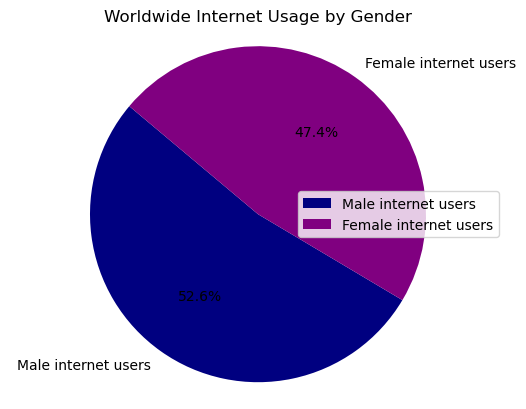

In [16]:
#pie chart of male vs female internet users

categories = ['Male internet users', 'Female internet users']
sizes = [internet_data["BG20) Male internet users"].sum(), internet_data["BG21) Female internet users"].sum()]

plt.pie(sizes, labels=categories, autopct='%1.1f%%', startangle=140, colors=['navy', 'purple'])
plt.title('Worldwide Internet Usage by Gender')
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# need to figure out how to make this chart work

#sizes = [internet_data["BG20) Male internet users"].sum(), internet_data["BG21) Female internet users"].sum()]
#sns.violinplot(x='4.1.2) Educational attainment', y=internet_data, data=internet_data)
#plt.title('Internet Users by Education Level')
#plt.show()

## Internet Usage by Income

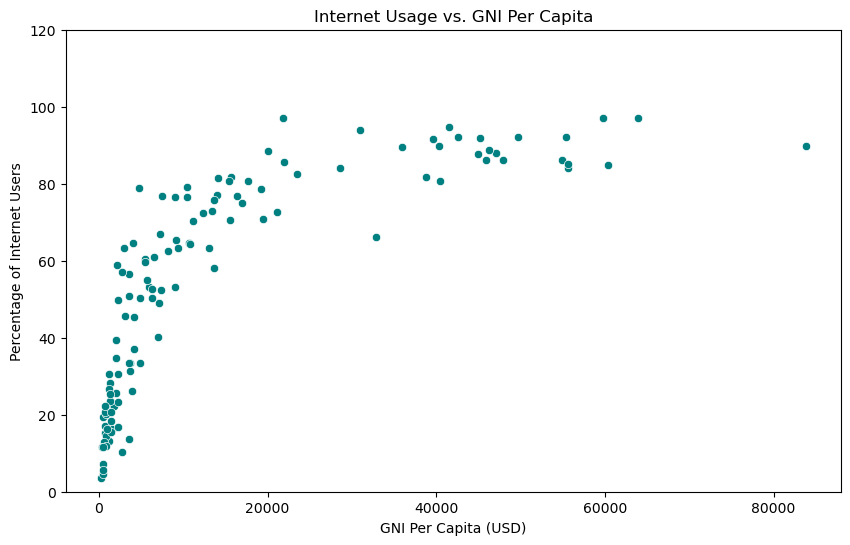

In [35]:
gni_per_capita_col = 'GNI Per Capita (USD per Person)'
internet_users_col = 'Internet Users (% of Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=gni_per_capita_col, y=internet_users_col, color='teal')

#plotting
plt.title('Internet Usage vs. GNI Per Capita')
plt.xlabel('GNI Per Capita (USD)')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])

plt.show()


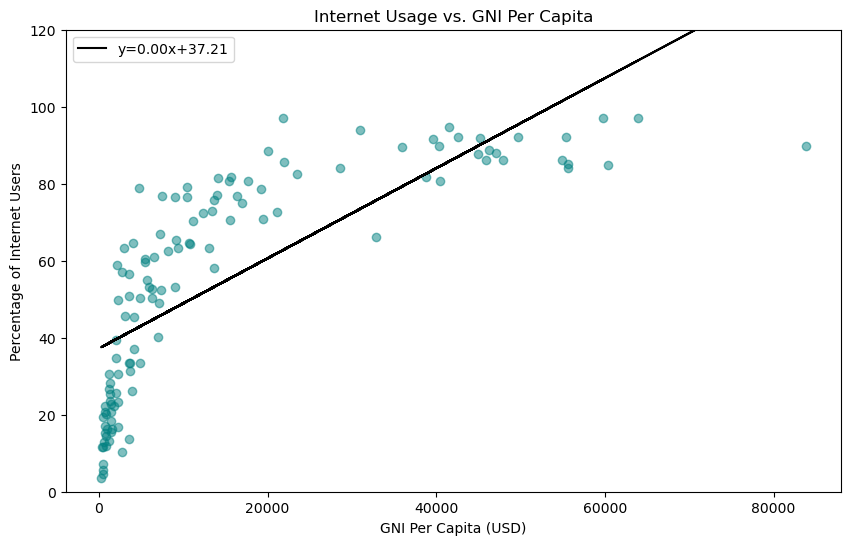

R-squared: 0.57


In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt

gni_per_capita_col = 'GNI Per Capita (USD per Person)'
internet_users_col = 'Internet Users (% of Population)'

#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(demo_df[gni_per_capita_col], demo_df[internet_users_col])

line = slope * demo_df[gni_per_capita_col] + intercept

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[gni_per_capita_col], demo_df[internet_users_col], alpha=0.5, color='teal')
plt.plot(demo_df[gni_per_capita_col], line, color='black', label=f'y={slope:.2f}x+{intercept:.2f}')
plt.title('Internet Usage vs. GNI Per Capita')
plt.xlabel('GNI Per Capita (USD)')
plt.ylabel('Percentage of Internet Users')
plt.ylim([0, 120])
plt.legend()
plt.show()

print(f"R-squared: {r_value**2:.2f}")


## Internet Usage by Education

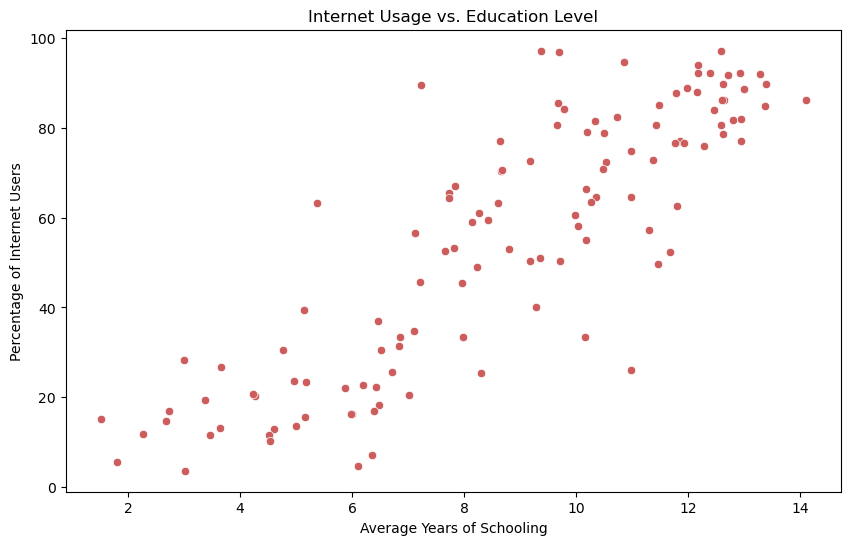

In [43]:

education_col = 'Education Level (Years of Schooling)'
internet_users_col = 'Internet Users (% of Population)'

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=demo_df, x=education_col, y=internet_users_col, color='indianred')
plt.title('Internet Usage vs. Education Level')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Percentage of Internet Users')

plt.show()


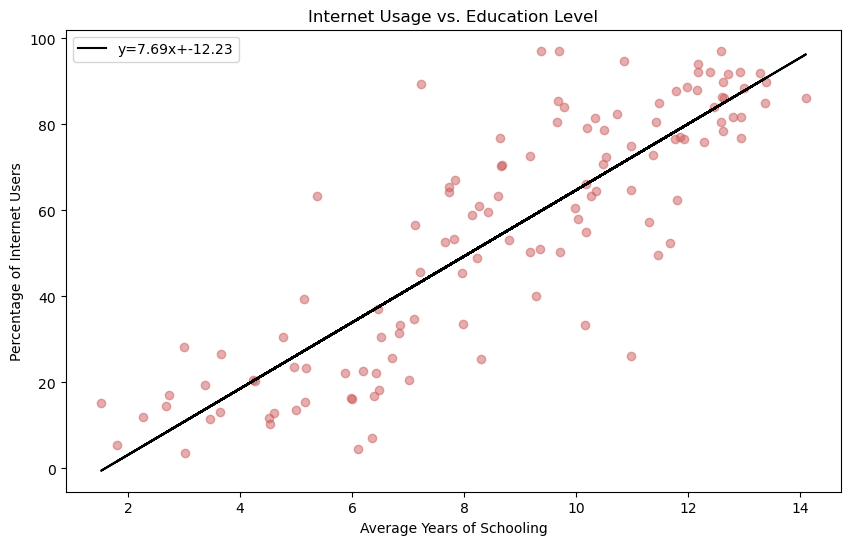

R-squared: 0.73


In [44]:
import scipy.stats as stats

#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(demo_df[education_col], demo_df[internet_users_col])

line = slope * demo_df[education_col] + intercept

#plotting
plt.figure(figsize=(10, 6))
plt.scatter(demo_df[education_col], demo_df[internet_users_col], alpha=0.5, color='indianred')
plt.plot(demo_df[education_col], line, label=f'y={slope:.2f}x+{intercept:.2f}', color='black')
plt.title('Internet Usage vs. Education Level')
plt.xlabel('Average Years of Schooling')
plt.ylabel('Percentage of Internet Users')
plt.legend()
plt.show()

print(f"R-squared: {r_value**2:.2f}")